In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")   

In [10]:
# Загрузка данных
def load_data():
    customers = pd.read_csv("./clean_data/customers.csv")
    geolocation = pd.read_csv("./clean_data/geolocation.csv")
    order_pay = pd.read_csv("./clean_data/order_payments.csv")
    reviews = pd.read_csv("./clean_data/order_reviews.csv")
    orders = pd.read_csv("./clean_data/orders.csv")
    item = pd.read_csv("./clean_data/orders_items.csv")
    category_name = pd.read_csv(
        "./clean_data/product_category_name_translation.csv")
    products = pd.read_csv("./clean_data/products.csv")
    sellers = pd.read_csv("./clean_data/sellers.csv")
    return customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers


# Объединение данных
def merge_data(orders, item, order_pay, reviews, products, customers, sellers, category_name):
    df = orders.merge(item, on='order_id', how='left')
    df = df.merge(order_pay, on='order_id', how='outer', validate='m:m')
    df = df.merge(reviews, on='order_id', how='outer')
    df = df.merge(products, on='product_id', how='outer')
    df = df.merge(customers, on='customer_id', how='outer')
    df = df.merge(sellers, on='seller_id', how='outer')
    df = df.merge(category_name, on="product_category_name", how="left")
    return df


# Очистка данных: удаление строк без customer_unique_id
def filter_customers(df):
    return df[~df["customer_unique_id"].isna()]


# Главная функция пайплайна
def main_pipeline():
    # Шаг 1: Загрузка данных
    customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers = load_data()

    # Шаг 2: Объединение данных
    df = merge_data(orders, item, order_pay, reviews, products,
                    customers, sellers, category_name)

    # Шаг 3: Фильтрация данных
    df = filter_customers(df)

    final_data = df

    return final_data

In [11]:
data = main_pipeline()

In [12]:
data.isna().sum()

order_id                         2980
customer_id                         0
order_status                     2980
order_purchase_timestamp         2980
order_approved_at                2980
order_delivered_carrier_date     2980
order_delivered_customer_date    2980
order_estimated_delivery_date    2980
order_item_id                    2980
product_id                       2980
seller_id                        2980
shipping_limit_date              2980
price                            2980
freight_value                    2980
payment_sequential               2983
payment_type                     2983
payment_installments             2983
payment_value                    2983
review_id                        3841
review_score                     3841
review_creation_date             3841
review_answer_timestamp          3841
product_category_name            4618
product_name_lenght              4618
product_description_lenght       4618
product_photos_qty               4618
product_weig

In [21]:
data.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP,small_appliances
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP,small_appliances
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP,small_appliances
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools


---

### EDA

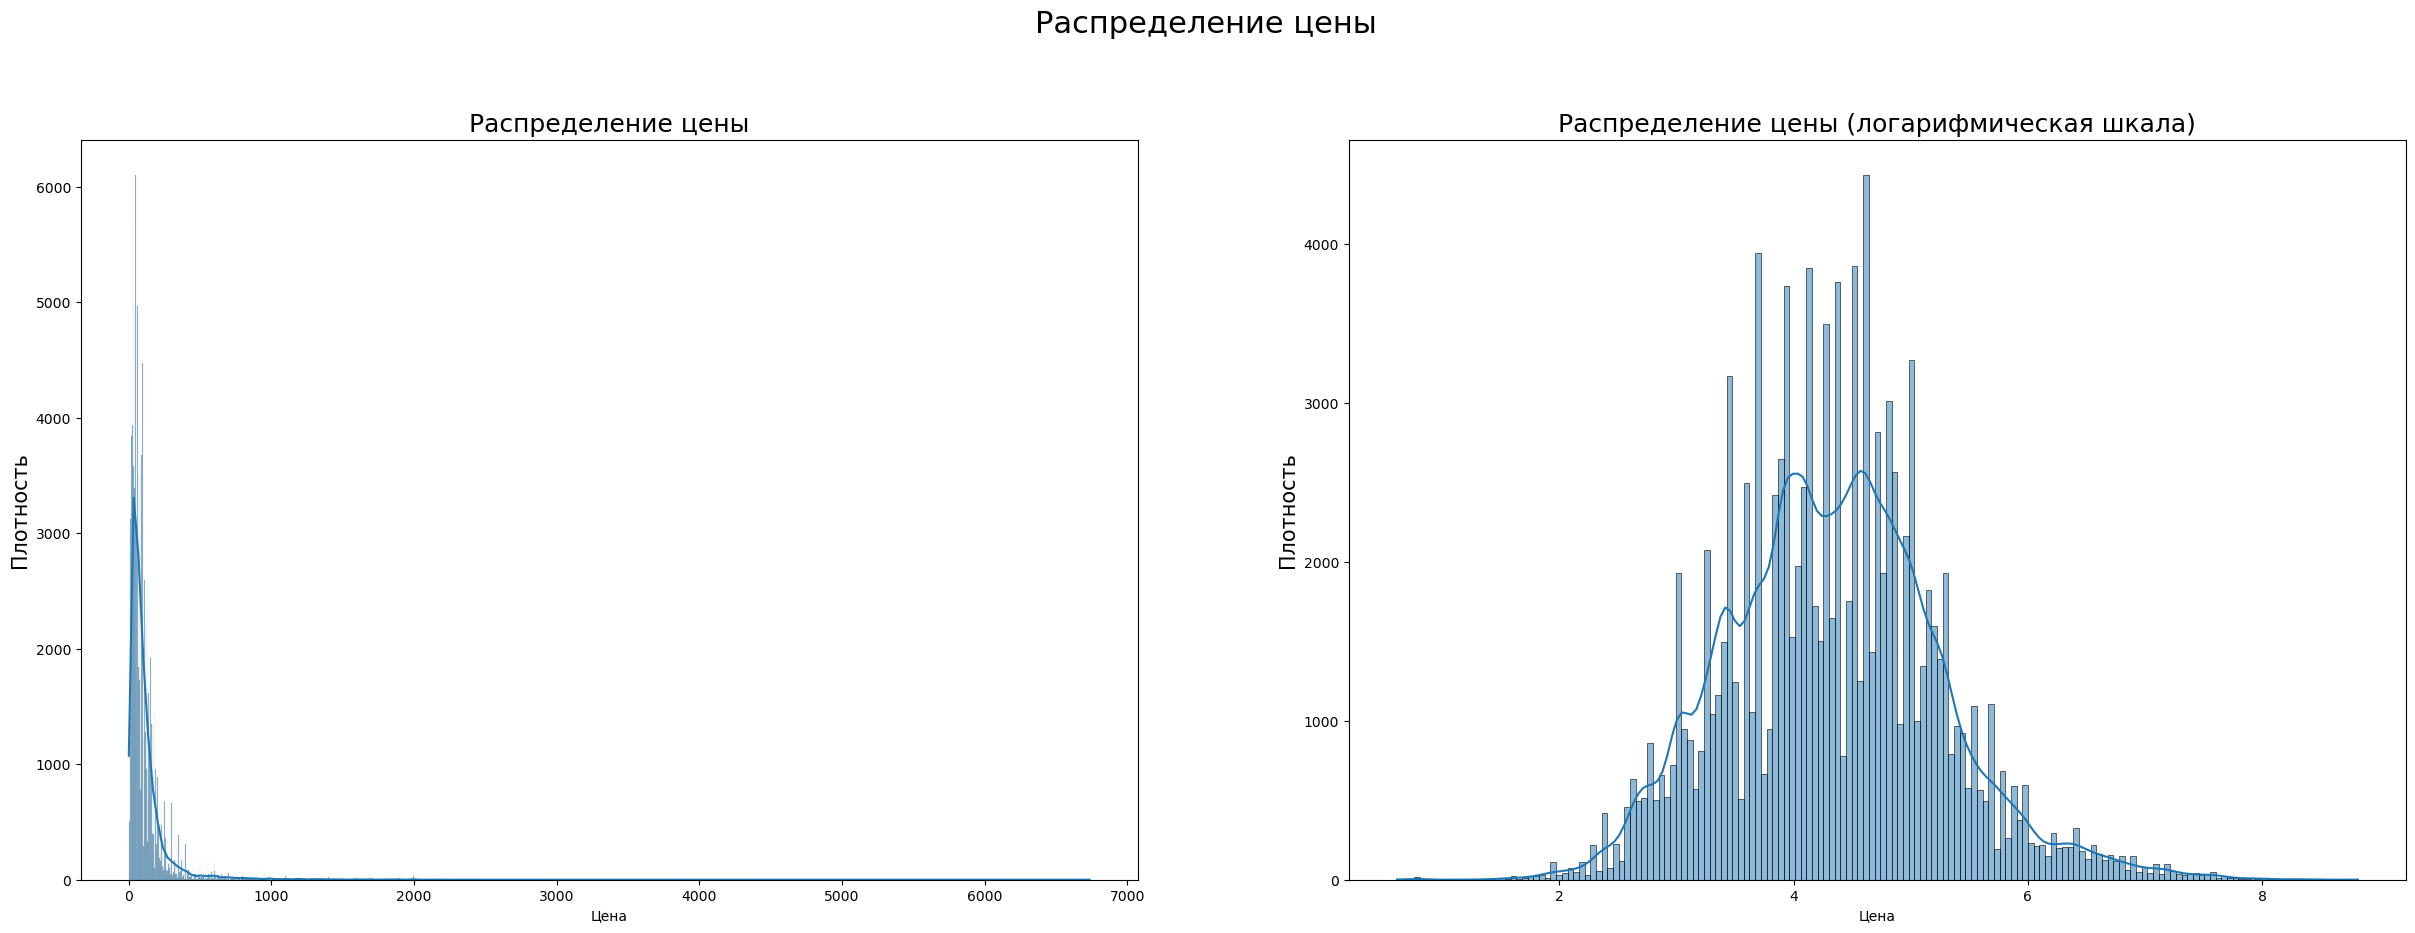

In [29]:
# Распределение цены
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

plt.suptitle('Распределение цены', fontsize=22)

graph_1 = sns.histplot(data['price'], ax=axes[0], kde=True)
graph_1.set_title("Распределение цены", fontsize=18)
graph_1.set_xlabel("Цена")
graph_1.set_ylabel("Плотность", fontsize=15)


graph_2 = sns.histplot(np.log(data['price']+1), ax=axes[1], kde=True) # +1 что бы не получать 0 под логарифмом
graph_2.set_title("Распределение цены (логарифмическая шкала)", fontsize=18)
graph_2.set_xlabel("Цена")
graph_2.set_ylabel("Плотность", fontsize=15)
plt.subplots_adjust(hspace=0.4, top=0.85)
plt.savefig(f'./eda/price_distr.png')
plt.show()

> Можно наблюдать длинный правый хвост распределения, что естественно приводит распределение к форме близкой к нормальной в случае логарифмирования признака, т.н. логнормальное распределение цены.

---

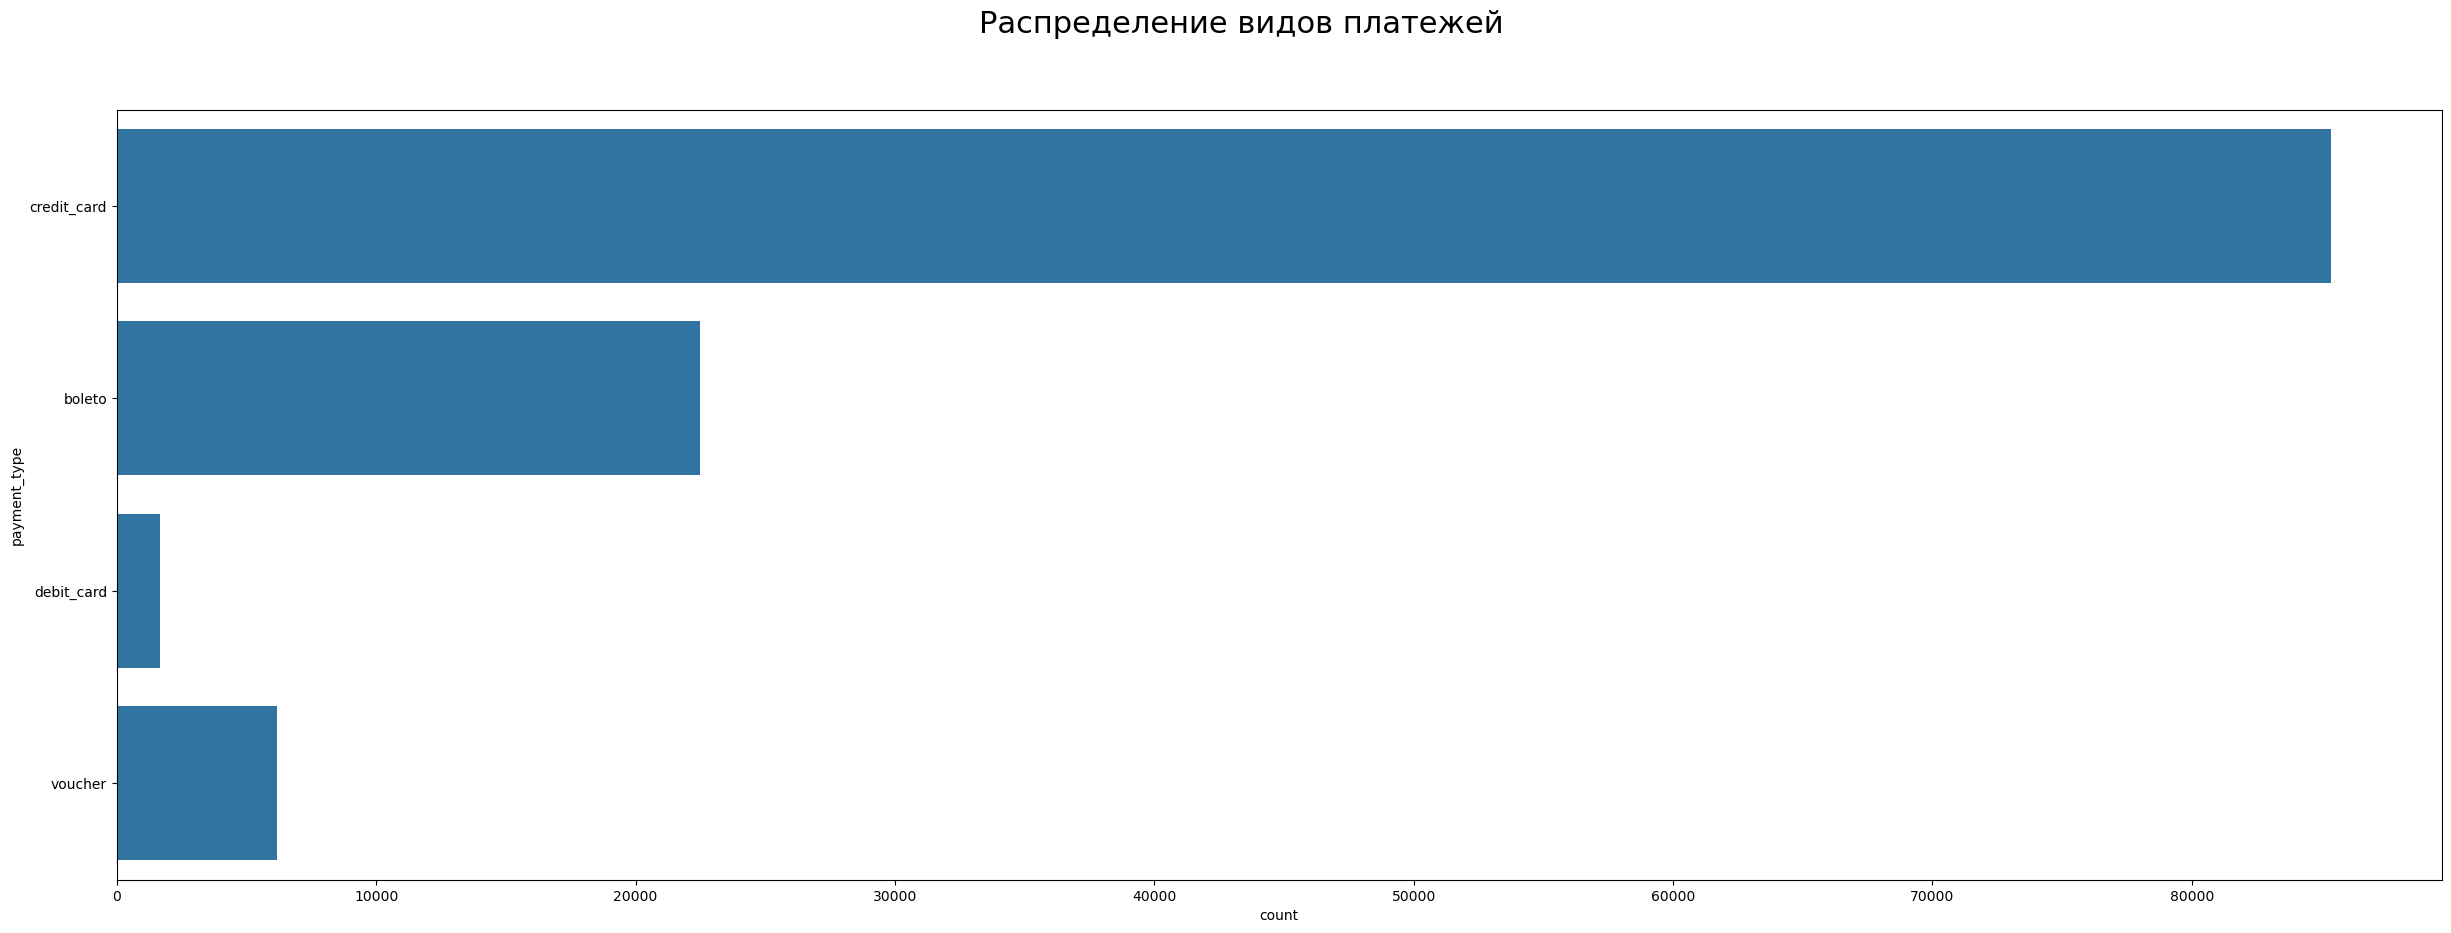

In [38]:
# Виды платежей

fig, axes = plt.subplots(1, 1, figsize=(30, 10))

plt.suptitle('Распределение видов платежей', fontsize=22)

graph_1 = sns.countplot(data['payment_type'])


plt.savefig(f'./eda/payment_type_distr.png')
plt.show()

> Основная часть покупок производится путем оплаты с кредитной карты, на втором месте стоит оплата инвойсами - B2B сегмент

---

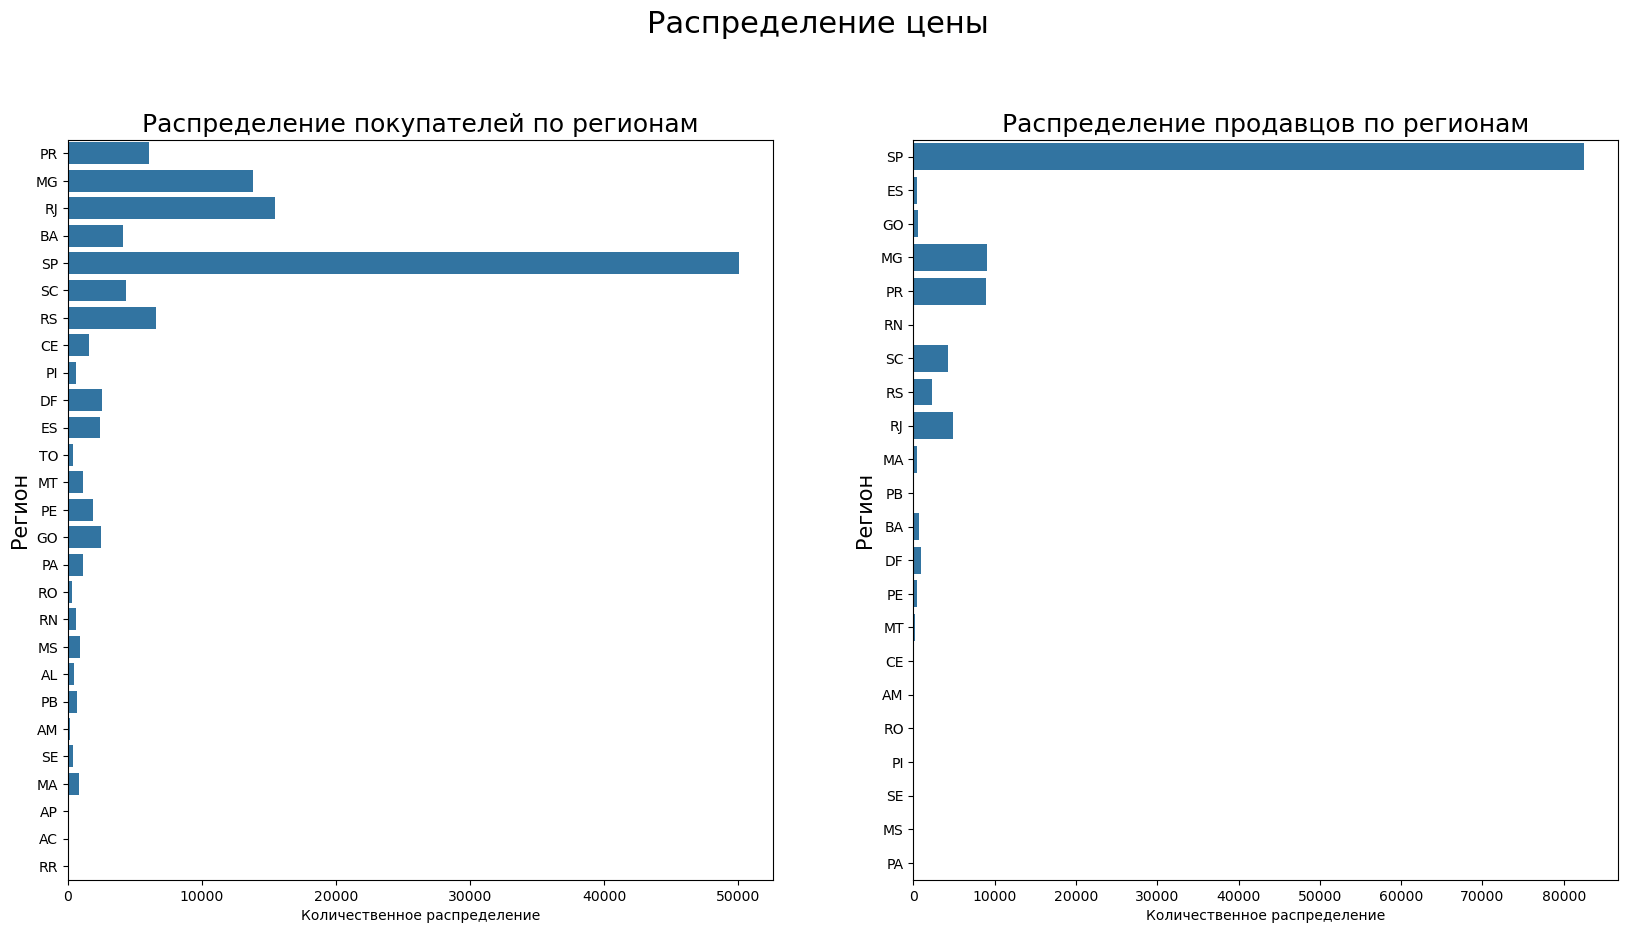

In [26]:
# Распределение покупателей и продавцов по районам
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plt.suptitle('Распределение цены', fontsize=22)

graph_1 = sns.countplot(data['customer_state'], ax=axes[0])
graph_1.set_title("Распределение покупателей по регионам", fontsize=18)
graph_1.set_xlabel("Количественное распределение")
graph_1.set_ylabel("Регион", fontsize=15)


graph_2 = sns.countplot(data['seller_state'], ax=axes[1])
graph_2.set_title("Распределение продавцов по регионам", fontsize=18)
graph_2.set_xlabel("Количественное распределение")
graph_2.set_ylabel("Регион", fontsize=15)
plt.subplots_adjust(hspace=0.4, top=0.85)
plt.savefig(f'./eda/region_distr.png')
plt.show()

> Можно наблюдать пересечение по модальному региона как у продавцов так и у покупателей, но при этом можно предположить наличие логистических проблем-задержек доставки для регионов покупателей PR, MG, RJ.

---

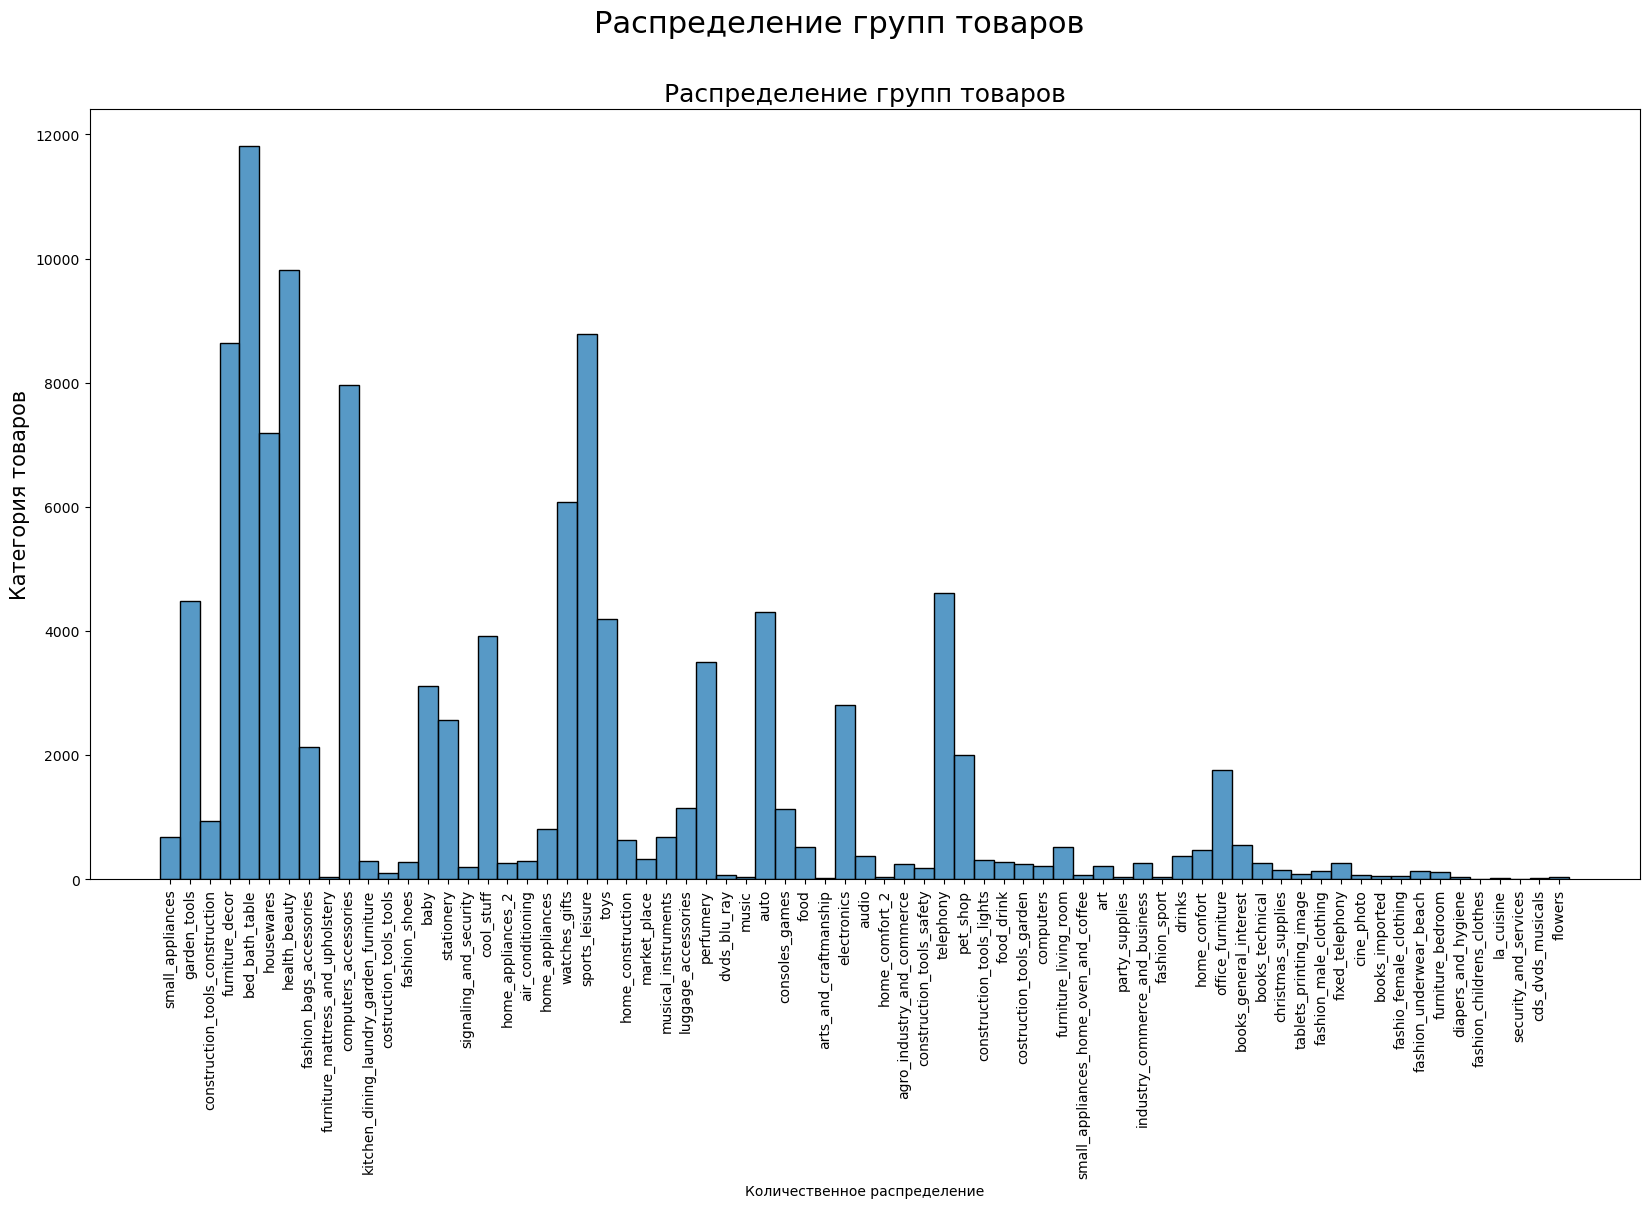

In [34]:
# Распределение покупателей и продавцов по районам
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

plt.suptitle('Распределение групп товаров', fontsize=22)

graph_1 = sns.histplot(data['product_category_name_english'])
graph_1.set_title("Распределение групп товаров", fontsize=18)
graph_1.set_xlabel("Количественное распределение")
graph_1.set_ylabel("Категория товаров", fontsize=15)
plt.xticks(rotation=90)

plt.savefig(f'./eda/product_category_distr.png')
plt.show()

> Мультимодальное распределение явно прослеживаются ключевые группы товаров, пользующиеся спросом:
- Товары для ремонта
- Фурнитура и декор
- Красота и здоровье
- Домашняя утварь
- Акксессуары для ПК
- Подарки
- Спорт товары
- Игрушки 

> Что говоорит о том, что мы имеем дело со стандартным маркетплейсом.

----

In [44]:
df_time = data.copy()
# Преобразуем дату в datetime, если не было сделано ранее
df_time['order_purchase_timestamp'] = pd.to_datetime(
    data['order_purchase_timestamp'])
# Установите индекс на order_purchase_timestamp
df_time.set_index('order_purchase_timestamp', inplace=True)
grouped_1 = df_time.groupby([pd.Grouper(freq='M'), 'customer_unique_id']).size().unstack(fill_value=0)

# Преобразуем обратно в длинный формат
grouped_1 = grouped_1.reset_index()
grouped_melted = pd.melt(grouped_1, id_vars='order_purchase_timestamp',
                        var_name='customer_unique_id', value_name='count')

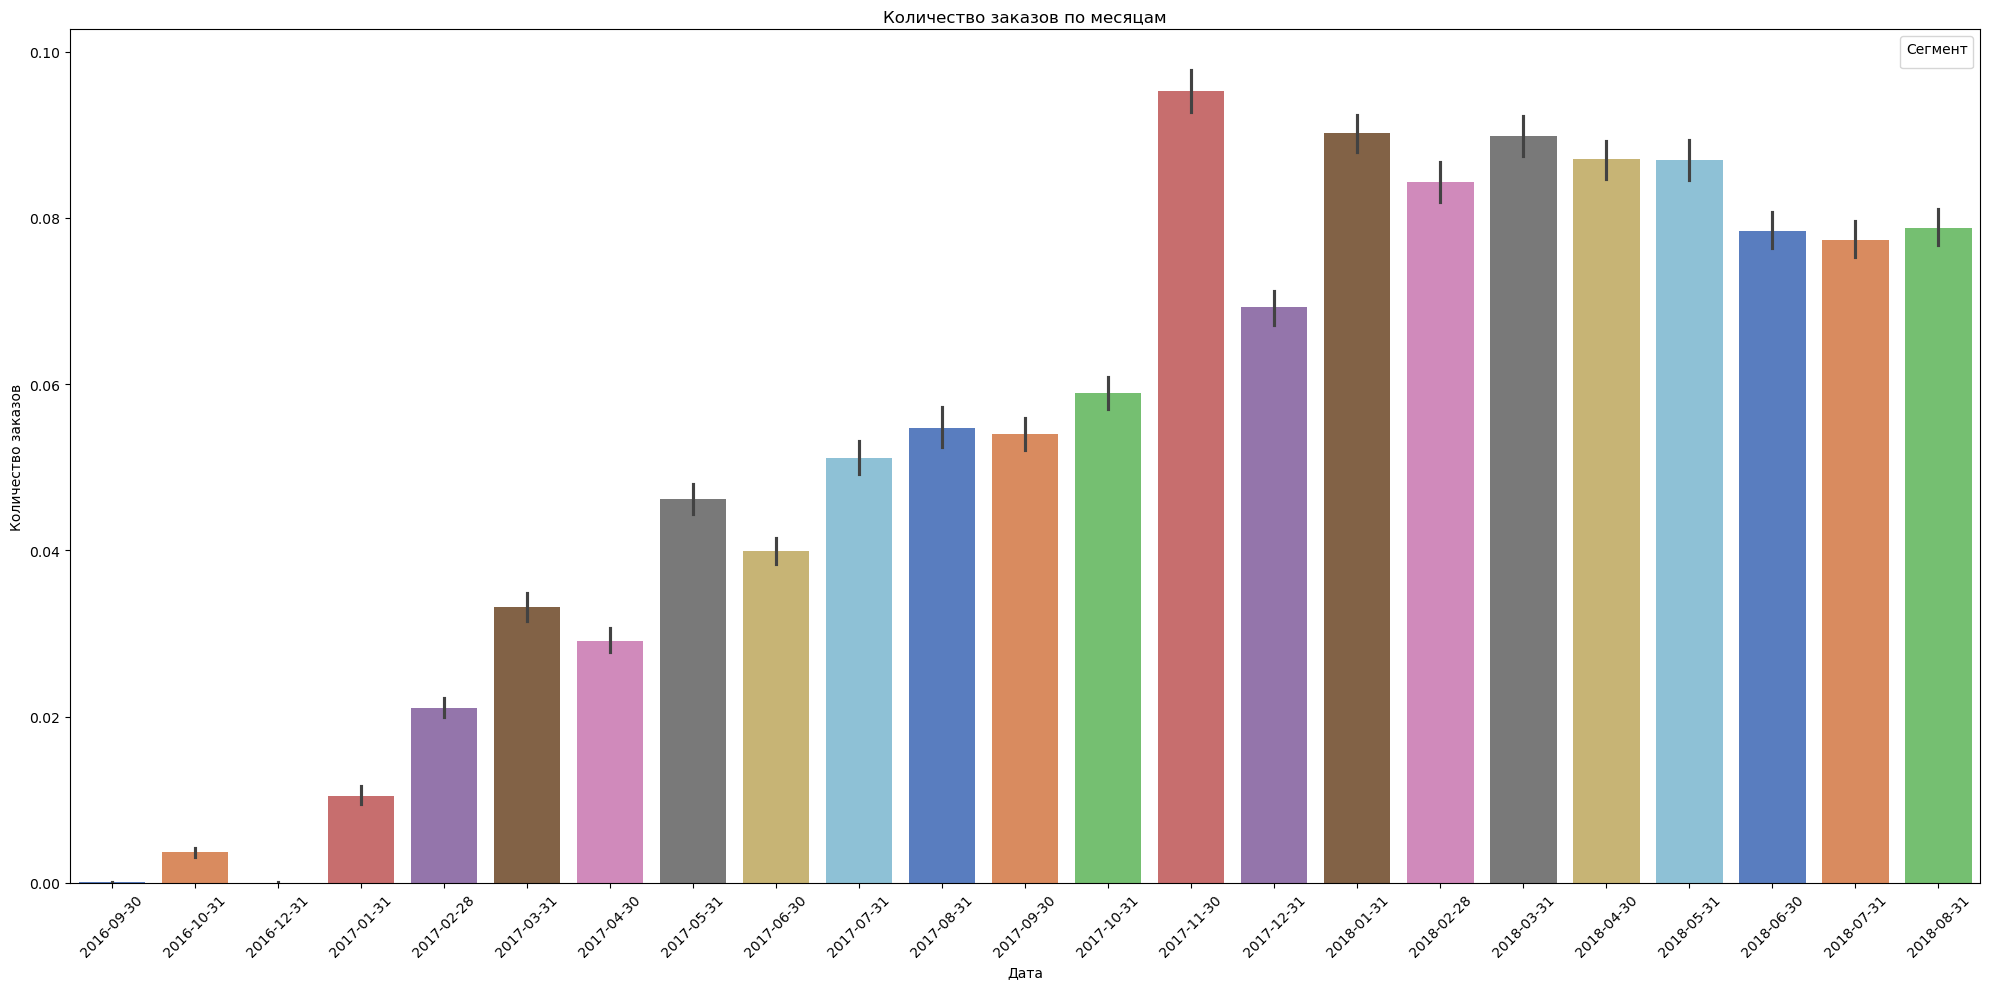

In [46]:
# Построение графика 
plt.figure(figsize=(20, 10))
sns.barplot(data=grouped_melted, x='order_purchase_timestamp',
            y='count', palette='muted')
plt.title('Количество заказов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.legend(title='Сегмент')
plt.tight_layout()
plt.savefig(f'./eda/purchase_dynamic.png')

> Можно отметить положительную динамику прироста продаж

In [47]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP,small_appliances
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP,small_appliances
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP,small_appliances
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools


---

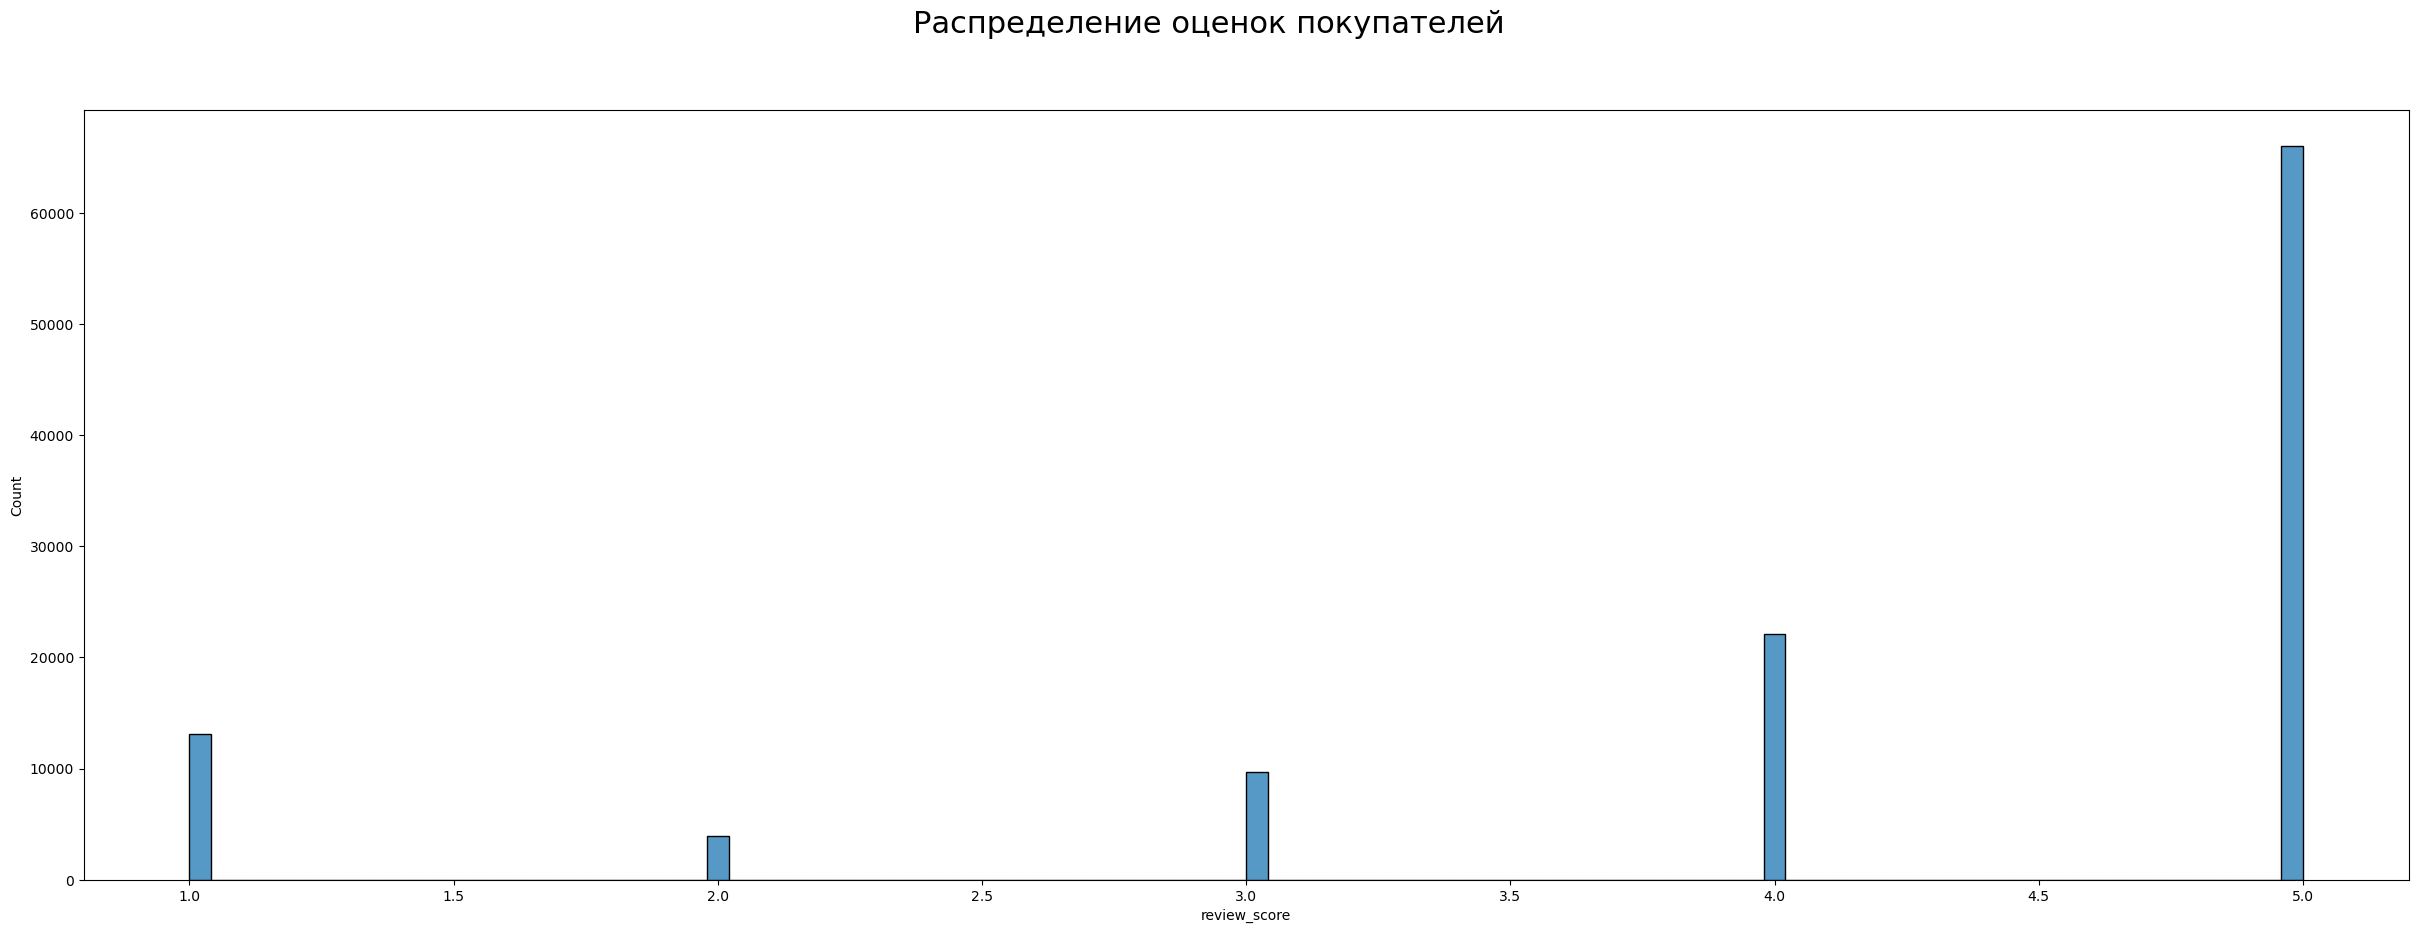

In [49]:
# Распределение оценок пользователей

fig, axes = plt.subplots(1, 1, figsize=(30, 10))

plt.suptitle('Распределение оценок покупателей', fontsize=22)

graph_1 = sns.histplot(data['review_score'])


plt.savefig(f'./eda/review_score_distr.png')
plt.show()

> По больлшей части покупатели остаются довольными приобретенными товарами